# Breast Cancer Pathology ML using healthcare.ai

#### About the dataset:

This dataset comes from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) and is freely available for download.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

    1. ID number 
    2. Diagnosis (M = malignant, B = benign) 

Ten real-valued features are computed for each cell nucleus: 

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour) 
9. symmetry 
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

## Imports and path

Healthcareai needs to be in the system path so that Python knows where to find it. Then, we'll import some of the other packages that we are going to need for this example.

In [34]:
# this cell is not necessary if you are able to import healthcare.ai without it.
import sys
sys.path.append('C:\\Users\\michael.mastanduno\\PycharmProjects\\healthcareai-py') # change to your path

In [35]:
%matplotlib inline
import healthcareai as hc
import pandas as pd # for managing data
import matplotlib.pyplot as plt # for plotting
import numpy # for working with numbers easily
from pandas.tools.plotting import scatter_matrix # cool scatter plot 
import random # for random starting points
plt.rcParams['figure.figsize'] = (20.0, 10.0) # make the default figure size a little bigger
plt.rcParams.update({'font.size': 14}) # and the font size

## Load the data and do some exploration

One benefit to Python is the incredible array of libaries that are available. A particularly good one is Pandas, which helps with manipulating and cleaning dataframes. It works with CSV files and SQL databases, does statistics, and makes visualization of data easy. Rather than write our own functions to do these things, healthcare.ai uses Pandas. Syntax is similar to R, but translation between the two languages will have to be another post.

In [36]:
df = pd.read_csv('C:\\Users\\michael.mastanduno\\Documents\\Data Science\\wisconsin_pathology_data.csv',
                     na_values=['None'])

df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Wow that's ugly! Let's see if we can clean it up a little bit before continuing.

In [37]:
columns=['PatientID', 'Diagnosis',
         'Radius_M', 'Texture_M', 'Perimeter_M', 'Area_M', 'Smoothness_M', 'Compactness_M', 'Concavity_M', 'ConcavePoints_M', 'Symmetry_M', 'FractalDimension_M',
         'Radius_S', 'Texture_S', 'Perimeter_S', 'Area_S', 'Smoothness_S', 'Compactness_S', 'Concavity_S', 'ConcavePoints_S', 'Symmetry_S', 'FractalDimension_S',
         'Radius_W', 'Texture_W', 'Perimeter_W', 'Area_W', 'Smoothness_W', 'Compactness_W', 'Concavity_W', 'ConcavePoints_W', 'Symmetry_W', 'FractalDimension_W']
df.columns = columns
df.head()

,PatientID,Diagnosis,Radius_M,Texture_M,Perimeter_M,Area_M,Smoothness_M,Compactness_M,Concavity_M,ConcavePoints_M,...,Radius_W,Texture_W,Perimeter_W,Area_W,Smoothness_W,Compactness_W,Concavity_W,ConcavePoints_W,Symmetry_W,FractalDimension_W
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [38]:
# Count the null values in each column to know if we need to impute or not.
df.isnull().sum()

PatientID             0
Diagnosis             0
Radius_M              0
Texture_M             0
Perimeter_M           0
Area_M                0
Smoothness_M          0
Compactness_M         0
Concavity_M           0
ConcavePoints_M       0
Symmetry_M            0
FractalDimension_M    0
Radius_S              0
Texture_S             0
Perimeter_S           0
Area_S                0
Smoothness_S          0
Compactness_S         0
Concavity_S           0
ConcavePoints_S       0
Symmetry_S            0
FractalDimension_S    0
Radius_W              0
Texture_W             0
Perimeter_W           0
Area_W                0
Smoothness_W          0
Compactness_W         0
Concavity_W           0
ConcavePoints_W       0
Symmetry_W            0
FractalDimension_W    0
dtype: int64

Real data will always have NULL values. But the curator of this data was nice and cleaned it for us. Looks pretty good. Let's try working on some basic statistics and plots.

## Statistics and Plots

,PatientID,Radius_M,Texture_M,Perimeter_M,Area_M,Smoothness_M,Compactness_M,Concavity_M,ConcavePoints_M,Symmetry_M,...,Radius_W,Texture_W,Perimeter_W,Area_W,Smoothness_W,Compactness_W,Concavity_W,ConcavePoints_W,Symmetry_W,FractalDimension_W
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


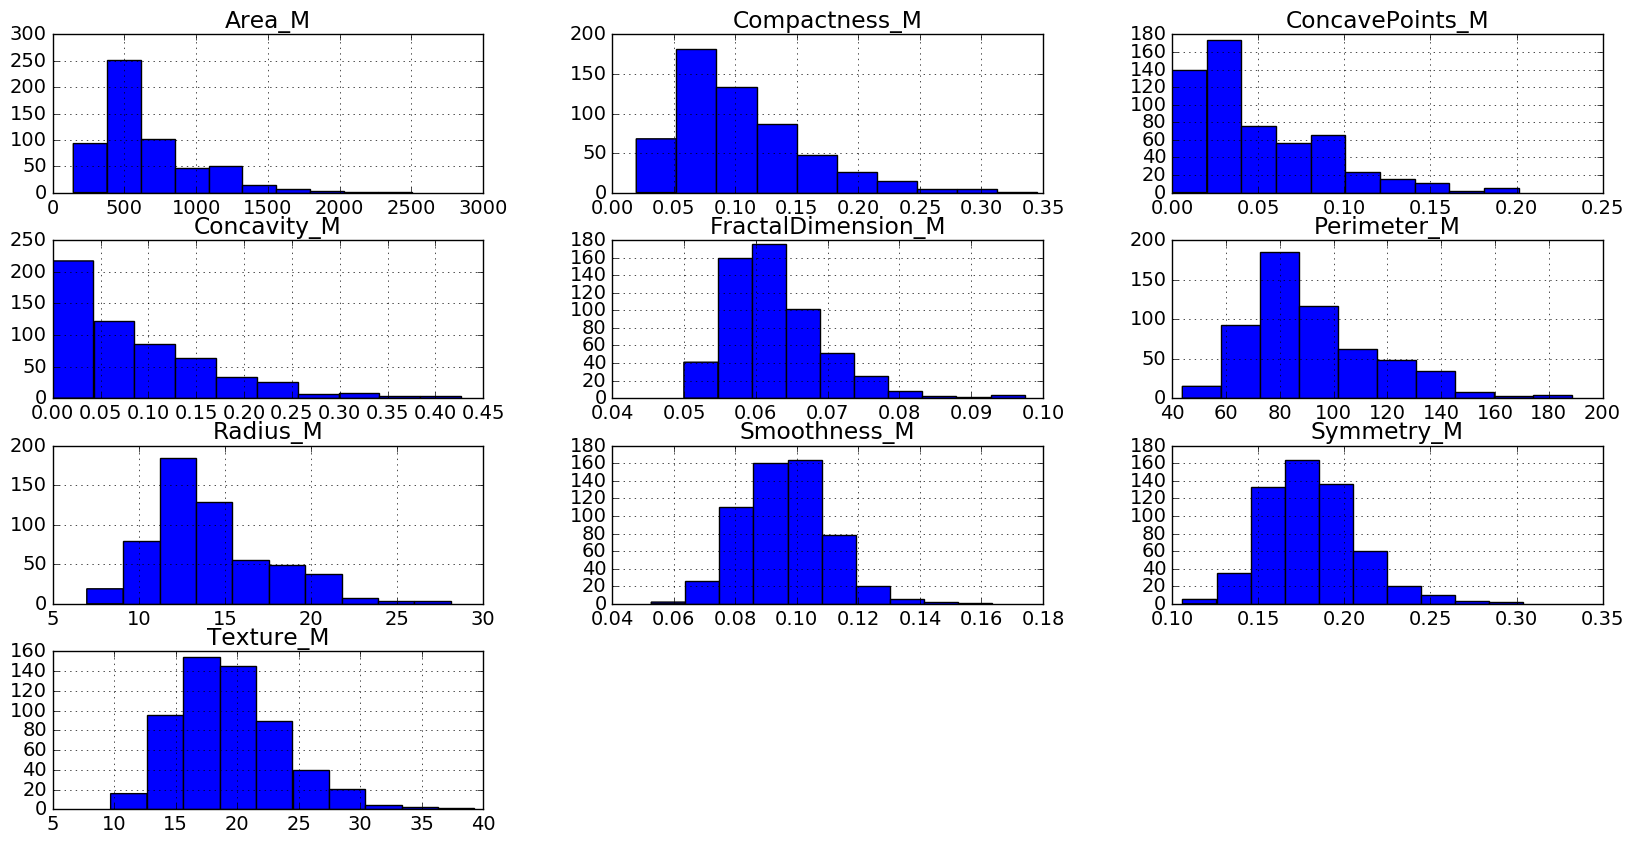

In [39]:
df.iloc[:,2:12].hist() # grabs all rows for columns 2 through 11, then makes a histogram for each column.
df.describe()

Histograms of all Malignant diagnoses


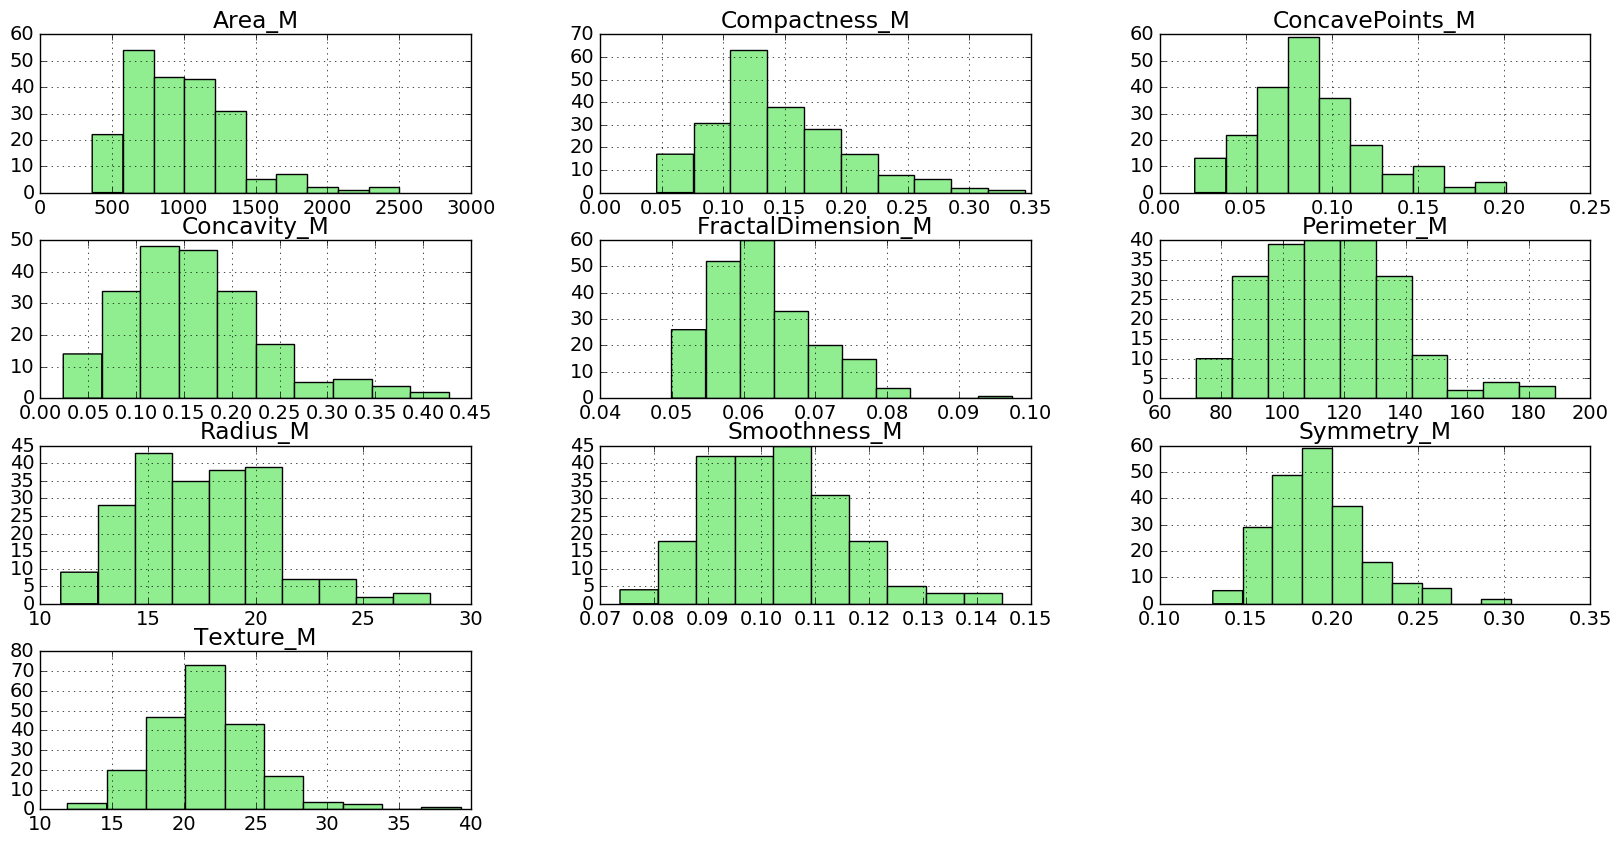

In [40]:
df.iloc[:,2:12].where(df['Diagnosis']=='M').hist(color='lightgreen')
print('Histograms of all Malignant diagnoses')

Histograms of all Benign diagnoses


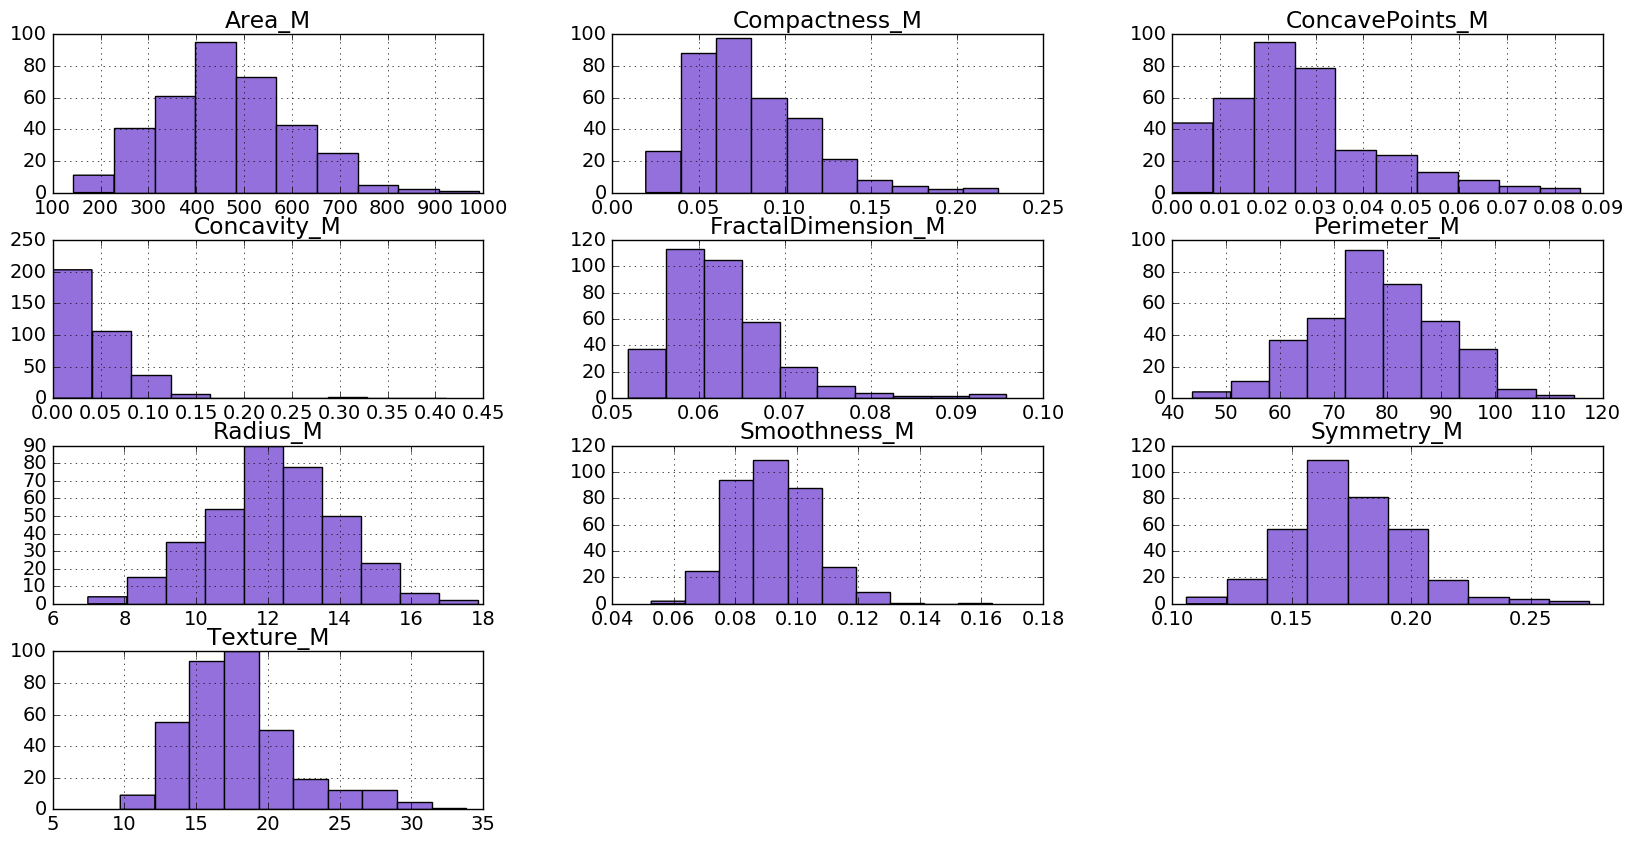

In [41]:
df.iloc[:,2:12].where(df['Diagnosis']=='B').hist(color='mediumpurple')
print('Histograms of all Benign diagnoses')

Looking the data distributions only, we see many different distributions. Some gaussian, some poisson. The interesting bit is the Concavity column. Those distributions look very different for the malignant vs. benign.

Mean Concavity for Both Diagnoses: Malignant in Green, Benign in Purple


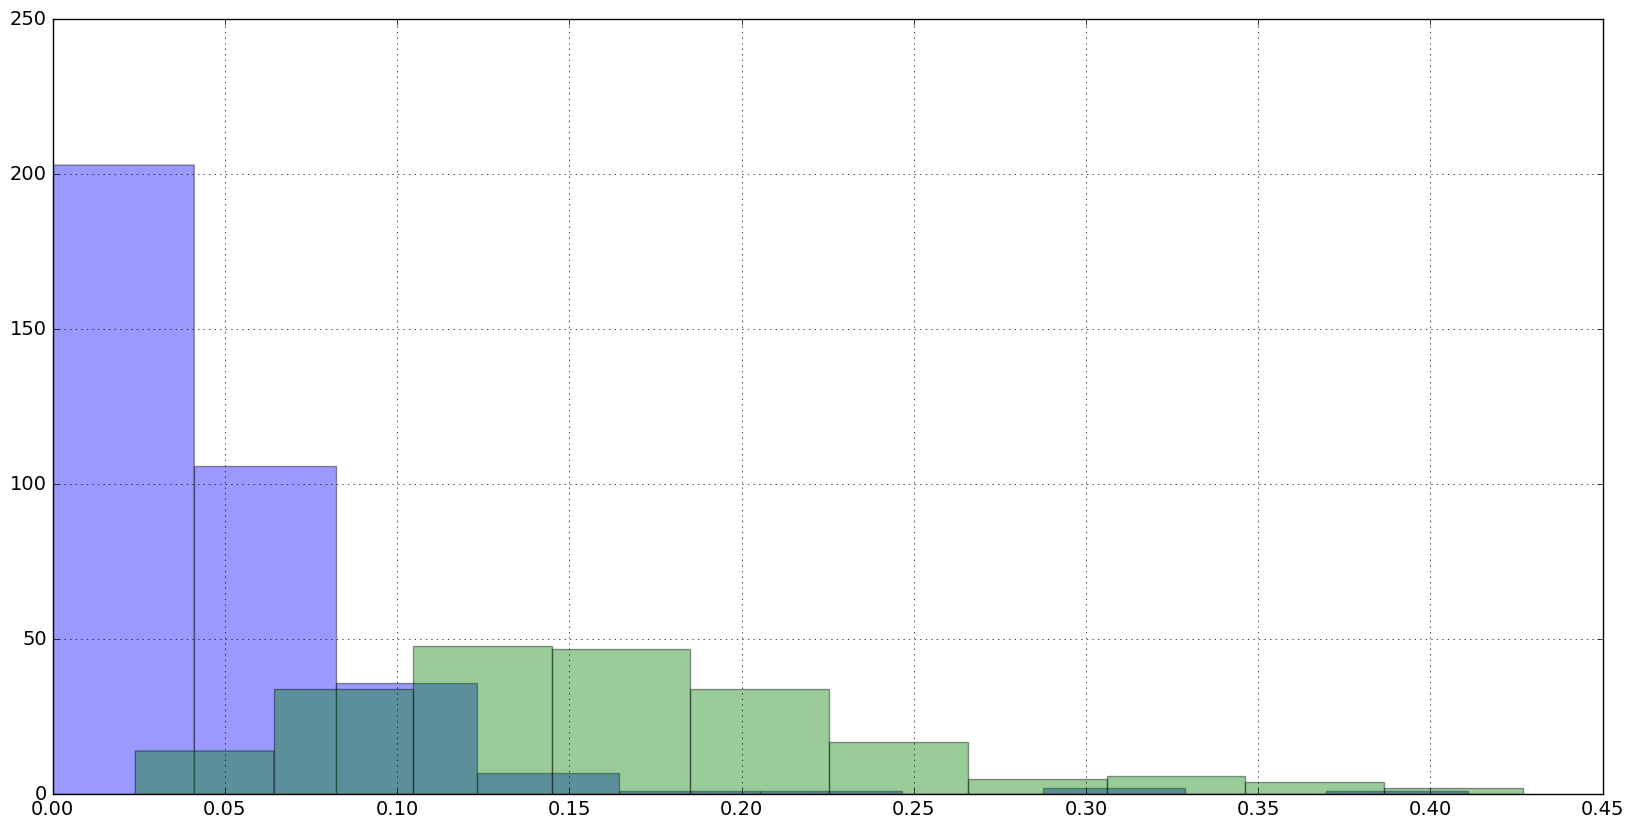

In [42]:
ax1 = df.groupby('Diagnosis').Concavity_M.hist(alpha=0.4)

print('Mean Concavity for Both Diagnoses: Malignant in Green, Benign in Purple')

Nice, you can really see the difference. This feature is likely to be an important one.

I'll do one more fancy plot so that we can see how each feature is correlated with each other feature.

Scatter plots of each feature vs. each other feature. Kernal Density Estimates on the Diagonal


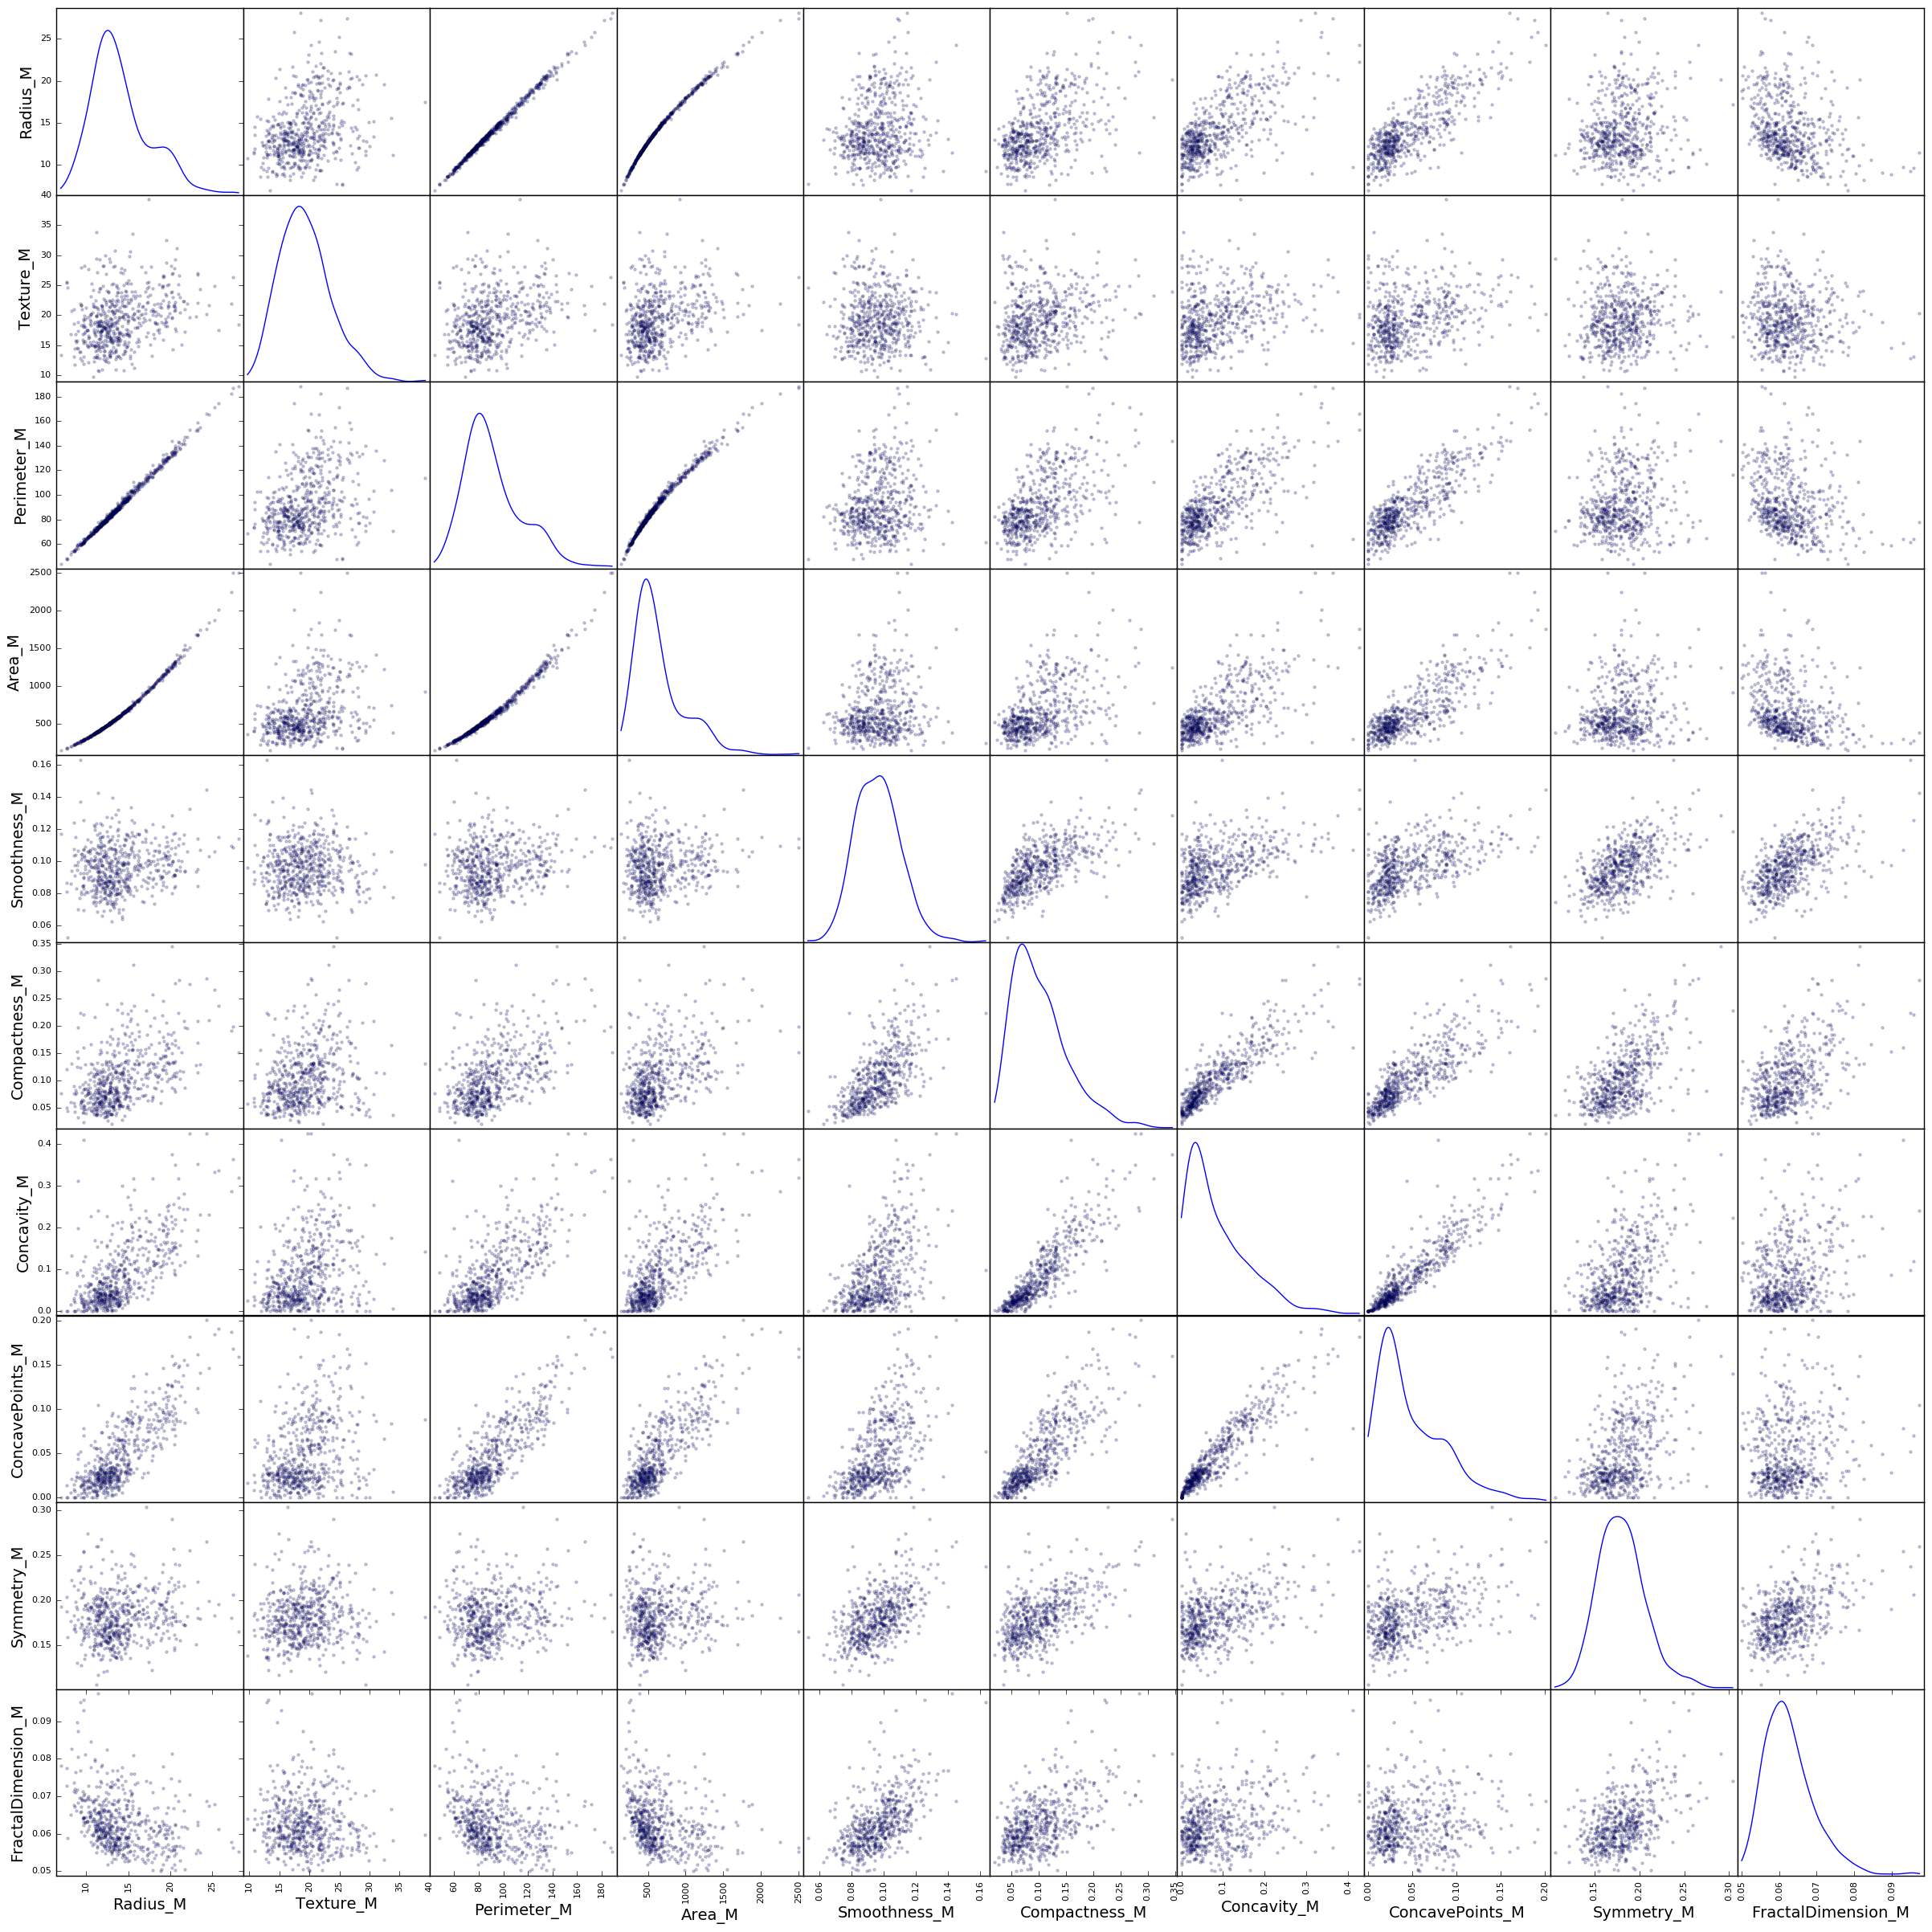

In [43]:
scatter_matrix(df.iloc[:,2:12], alpha=0.2, figsize=(30, 30), diagonal='kde')
print('Scatter plots of each feature vs. each other feature. Kernal Density Estimates on the Diagonal')

This shows how each feature is related to each other feature. It shows which features might be correlated or not. The diagonal shows a probability distribution function of each feature based on the sample data. You could also do histograms and boxplots.

So far all that we have really done is load the data and explore it (just the means of features). The exploration is optional, and you'd probably do significantly less if you knew the data distributions, null counts, etc, already. In any case, we're ready to train a model.

## Model Building Using Healthcare.ai

We'll build 2 different models here using healthcare.ai. Both of them rely on a DevelopSupervisedModel object to work.  

In [44]:
random.seed(43) # <-- used to make results reproducible
# change the predicted column to be Malignant = 1 and Benign = 0

# a quick note about iloc vs. loc. Both can be used to select data in a pandas dataframe. 
# iloc grabs things by the location. "Select the first x rows."
# loc grabs things by their values. "Select all rows that are equal to x"
# Here, I'm using loc to set all rows where Diagnosis is M to be equal to 1.
df.loc[df['Diagnosis'] == 'M', 'Diagnosis'] = 1
df.loc[df['Diagnosis'] == 'B', 'Diagnosis'] = 0

params = hc.DevelopSupervisedModel(modeltype='classification', # we are making a prediction of a binary variable. classification 
                           df=df, # the dataframe where the data is stored.
                           predictedcol='Diagnosis', # the column we want the model to predict.
                           graincol='PatientID', # the column that carries that data's grain.
                           impute=True, # fills in missing values.
                           debug=False) # extra output comes out if this is true.

Now that we've arranged the data and done imputation, let's create a logistic regression (for classification) model. We'll use the Area under an [ROC curve](http://healthcare.ai/blog/2016/12/15/model-evaluation-using-roc-curves/), or AUC, as the metric for evaluation. 

In [45]:
LR = params.linear(cores=1,
         debug=False)


 LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)
Best hyper-parameters found after tuning:
No hyper-parameter tuning was done.

Metrics:
AU_ROC Score: 0.988863413036

AU_PR Score: 0.985847346486


Wow, we did very well! The AU_ROC and AU_PR scores are nearly perfect. For illustration's sake, let's do run a random forest as well. That way we will get feature importance and the model might be a little more interpretable.


 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Best hyper-parameters found after tuning:
{'max_features': 4}

Metrics:
AU_ROC Score: 0.983458892892

AU_PR Score: 0.983791222211

Variable importance:
1. ConcavePoints_W (0.160022)
2. Perimeter_W (0.112054)
3. Area_W (0.093404)
4. Radius_W (0.093222)
5. ConcavePoints_M (0.063283)
6. Concavity_W (0.060214)
7. Area_S (0.054782)
8. Concavity_M (0.050691)
9. Perimeter_M (0.042415)
10. Area_M (0.040870)
11. Radius_M (0.029487)
12. Compactness_M (0.028478)
13. Perimeter_S (0.020264)
14. Radius_S (0.018447)
15. Compactness_W (0.017228)
16. Smoothness_W (0.016134)
17. Texture_W (0.015115)
18. Concavity_S (0.012831

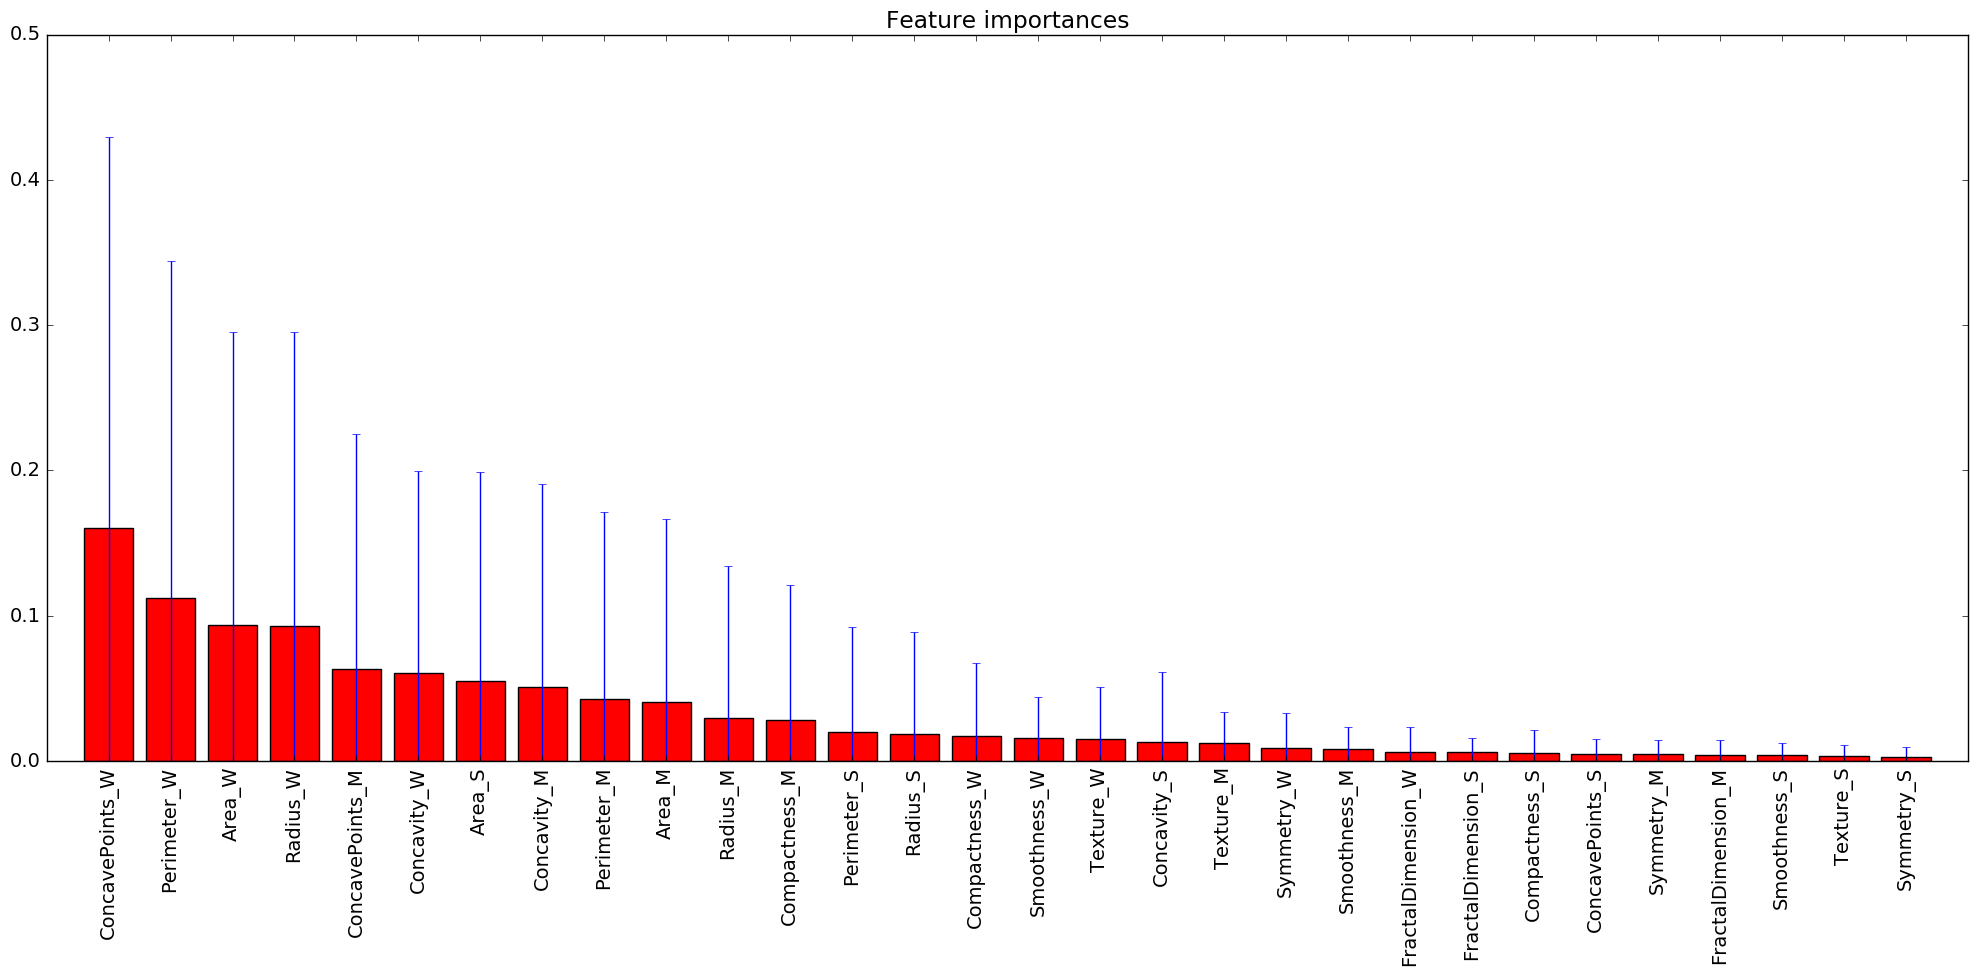

In [46]:
params.random_forest(cores=1,
                     trees=200, # this sets the size of the forest
                     tune=True, # this will explore hyperparameters
                     debug=False)

# and plot feature importance
params.plot_rffeature_importance(save=False)

Random Forest gives a slightly lower AU_ROC and AU_PR than logistic regression. It's still pretty great at 0.98 though. And the added benefit is that feature importance comes through. The Worst Area and Worst Perimiter variables were the most important, accounting for 14% and 13% of the decisions. 

Actually, Those "Worst" features take the top 4 most important variables. Those features were created, not pulled from a spreadsheet. If the creators of the dataset hadnt been diligent with their feature engineering, we might not have had them. Let's check out how the performance would have been without those variables. I'll run the same models on just the "Mean" features.

## Model building with a reduced dataset. For science!

In [47]:
random.seed(43) # <-- used to make results reproducible

df_small = df.iloc[:,0:12]

params = hc.DevelopSupervisedModel(modeltype='classification', # 
                           df=df_small,
                           predictedcol='Diagnosis',
                           graincol='PatientID',
                           impute=True,
                           debug=False)

In [48]:
params.linear(cores=1,
         debug=False)


 LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)
Best hyper-parameters found after tuning:
No hyper-parameter tuning was done.

Metrics:
AU_ROC Score: 0.986570586309

AU_PR Score: 0.981987877245


Wow, we did very well! The AU_ROC and AU_PR scores are nearly perfect. For illustration's sake, let's do run a random forest as well. That way we will get feature importance and the model might be a little more interpretable.

In [49]:
params.random_forest(cores=1,
                     trees=200, # this sets the size of the forest
                     tune=True, # this will explore hyperparameters
                     debug=False)


 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Best hyper-parameters found after tuning:
{'max_features': 2}

Metrics:
AU_ROC Score: 0.977563052735

AU_PR Score: 0.972695856957

Variable importance:
1. ConcavePoints_M (0.218657)
2. Radius_M (0.159801)
3. Concavity_M (0.152887)
4. Perimeter_M (0.131881)
5. Area_M (0.123142)
6. Compactness_M (0.065481)
7. Texture_M (0.058078)
8. Smoothness_M (0.038284)
9. Symmetry_M (0.030481)
10. FractalDimension_M (0.021308)


 We can plot an ROC curve for the 2 models to compare them. [ROC curve](http://healthcare.ai/blog/2016/12/15/model-evaluation-using-roc-curves/).

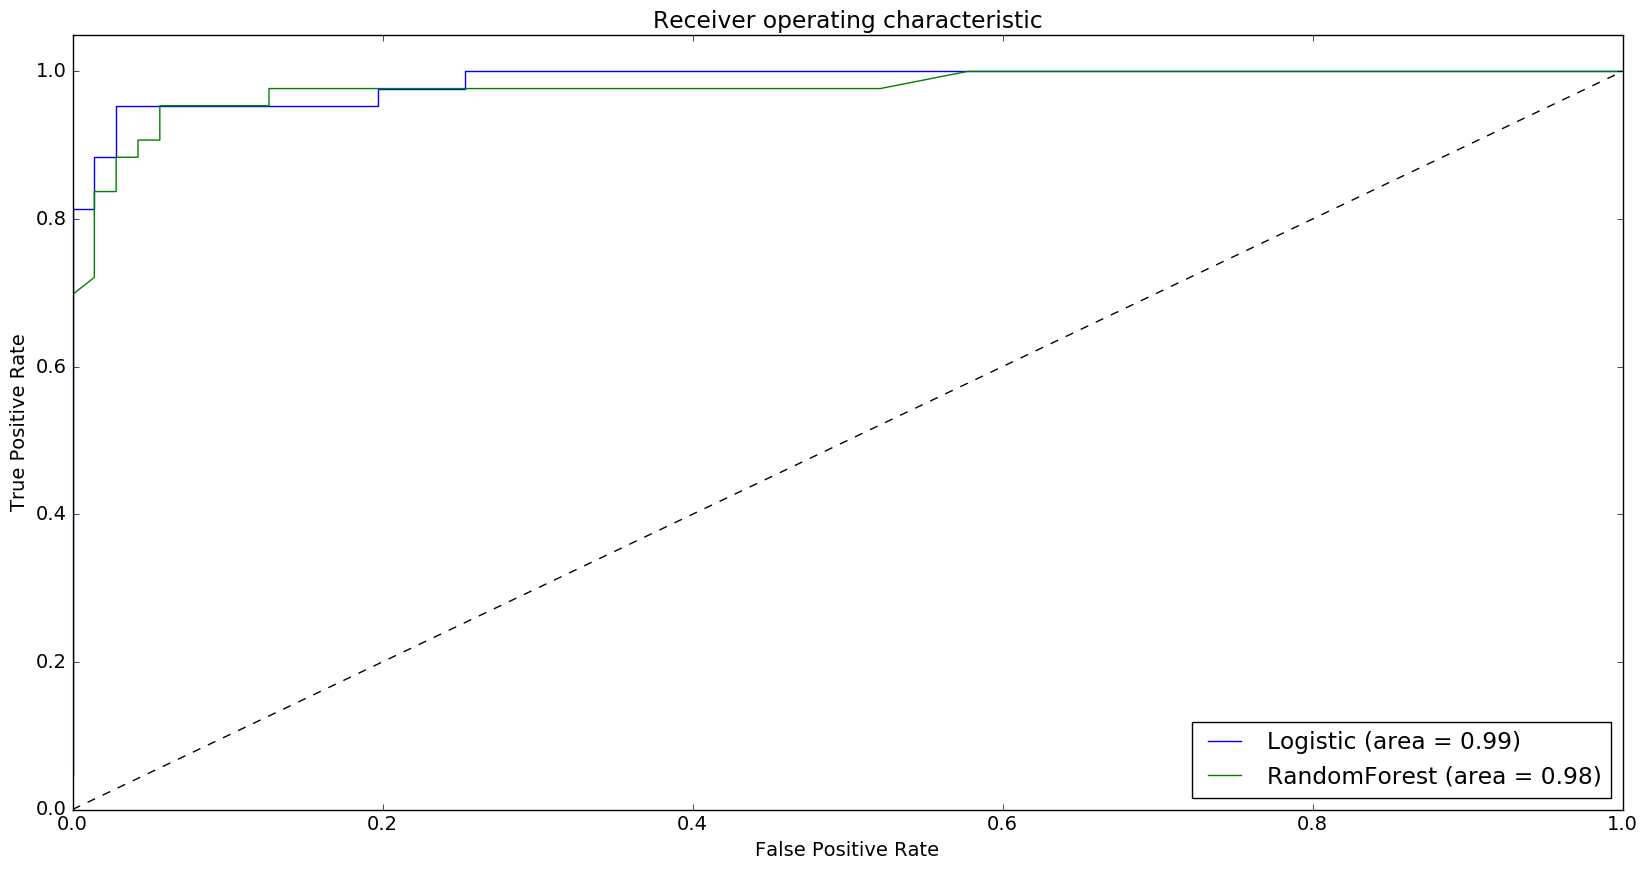

In [50]:
params.plot_roc(debug=False,
               save=False)

All right. We took out the engineered features and the model still did very well. The performance did drop a little bit, but it's still excellent. Would it have been worth it to engineer those features with an AUC of 0.96 first? Probably not, but it really depends on our business question. Remember, model building is an iterative process. Start with an MVP and improve if you need to. Thanks for reading!

## Feedback? Questions?

Reach out to Mike Mastanduno (mike.mastanduno@healthcatalyst.com) if you have any questions!